In [1]:
# Run this!
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
print('keras using %s backend'%keras.backend.backend())
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

keras using tensorflow backend


In [3]:
# Here we import the dataset, and split it into the training, validation, and test sets.
from keras.datasets import mnist
# This is our training data, with 6400 samples.
###
# REPLACE <addTrainX> WITH train_X AND <addTrainY> WITH train_Y
###
train_X = mnist.load_data()[0][0][:6400].astype('float32')
train_Y = mnist.load_data()[0][1][:6400]
###
# This is our validation data, with 1600 samples.
###
# REPLACE <addValidX> WITH valid_X AND <addValidY> WITH valid_Y
###
valid_X = mnist.load_data()[1][0][:1600].astype('float32')
valid_Y = mnist.load_data()[1][1][:1600]
###
# This is our test data, with 2000 samples.
###
# REPLACE <addTextX> WITH test_X AND <addTextY> WITH test_Y
###
test_X = mnist.load_data()[1][0][-2000:].astype('float32')
test_Y = mnist.load_data()[1][1][-2000:]
###
print('train_X:', train_X.shape, end = '')
print(', train_Y:', train_Y.shape)
print('valid_X:', valid_X.shape, end = '')
print(', valid_Y:', valid_Y.shape)
print('test_X:', test_X.shape, end = '')
print(', test_Y:', test_Y.shape)

train_X: (6400, 28, 28), train_Y: (6400,)
valid_X: (1600, 28, 28), valid_Y: (1600,)
test_X: (2000, 28, 28), test_Y: (2000,)


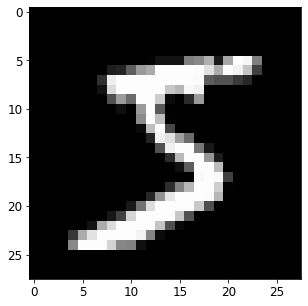

In [8]:
###
# REPLACE THE <addSample> BELOW WITH train_X[0] OR ANOTHER SAMPLE e.g. train_X[1] or train_X[2]
###
graph.imshow(train_X[0], cmap = 'gray', interpolation = 'nearest')
###
graph.show()

In [9]:
# First off, let's reshape our X sets so that they fit the convolutional layers.
# This gets the image dimensions - 28
dim = train_X[0].shape[0]
###
# REPLACE THE <addRehape> BELOW WITH reshape
###
train_X = train_X.reshape(train_X.shape[0], dim, dim, 1)
valid_X = valid_X.reshape(valid_X.shape[0], dim, dim, 1)
test_X = test_X.reshape(test_X.shape[0], dim, dim, 1)
###
# Next up - feature scaling.
# We scale the values so they are between 0 and 1, instead of 0 and 255.
###
# REPLACE THE <completeCalculation> BELOW WITH /255
###
train_X = train_X /255
valid_X = valid_X /255
test_X = test_X /255
###
# Now we print the label for the first example
print(train_Y[0])

5


In [10]:
###
# REPLACE THE <addCategorical> BELOW WITH to_categorical
###
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)
###
# 10 being the number of categories (numbers 0 to 9)
print(train_Y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# Sets a randomisation seed for replicatability.
np.random.seed(6)
###
# REPLACE THE <addSequential> BELOW WITH Sequential() (don't forget the () )
###
model = Sequential()
###

In [12]:
###
# REPLACE THE <addConv2D> BELOW WITH Conv2D
###
model.add(Conv2D(28, kernel_size = (3, 3), activation = 'relu', input_shape = (dim, dim, 1)))
model.add(Conv2D(56, (3, 3), activation = 'relu'))
###

In [13]:
# Pooling layers help speed up training time and make features it detects more robust.
# They act by downsampling the data - reducing the data size and complexity.
###
# REPLACE THE <addMaxPooling2D> BELOW WITH MaxPooling2D
###
model.add(MaxPooling2D(pool_size = (2, 2)))
###
# Dropout is a technique to help prevent overfitting
# It makes nodes 'dropout' - turning them off randomly.
###
# REPLACE THE <addDropout> BELOW WITH Dropout
###
model.add(Dropout(0.125))
###
###
# REPLACE THE <addFlatten> BELOW WITH Flatten()
###
model.add(Flatten())
###

In [14]:
# Dense layers perform classification - we have extracted the features with the convolutional pre-processing
model.add(Dense(128, activation='relu'))
# More dropout!
model.add(Dropout(0.25))
# Next is our output layer
# Softmax outputs the probability for each category
###
# REPLACE <updateHere> BELOW WITH 10, THE NUMBER OF CLASSES (DIGITS 0 TO 9)
###
model.add(Dense(10, activation=tf.nn.softmax))
###
# And finally, we compile.
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [15]:
###
# REPLACE THE <addTrainX> WITH train_X, <addTrainY> WITH train_Y, <addValidX> WITH valid_X, AND <addValidY> WITH valid_Y
###
training_stats = model.fit(train_X, train_Y, batch_size = 128, epochs = 12, verbose = 1, validation_data = (valid_X, valid_Y))
###
###
# REPLACE THE <addEvaluate> BELOW WITH evaluate
###
evaluation = model.evaluate(test_X, test_Y, verbose=0)
###
print('Test Set Evaluation: loss = %0.6f, accuracy = %0.2f' %(evaluation[0], 100 * evaluation[1]))
# We can plot our training statistics to see how it developed over time
accuracy, = graph.plot(training_stats.history['acc'], label = 'Accuracy')
training_loss, = graph.plot(training_stats.history['loss'], label = 'Training Loss')
graph.legend(handles = [accuracy, training_loss])
loss = np.array(training_stats.history['loss'])
xp = np.linspace(0,loss.shape[0],10 * loss.shape[0])
graph.plot(xp, np.full(xp.shape, 1), c = 'k', linestyle = ':', alpha = 0.5)
graph.plot(xp, np.full(xp.shape, 0), c = 'k', linestyle = ':', alpha = 0.5)
graph.show()

Epoch 1/12
50/50 [==============================] - 24s 479ms/step - loss: 0.8704 - accuracy: 0.7503 - val_loss: 0.4665 - val_accuracy: 0.8612
Epoch 2/12
50/50 [==============================] - 21s 413ms/step - loss: 0.3277 - accuracy: 0.9064 - val_loss: 0.3236 - val_accuracy: 0.9056
Epoch 3/12
50/50 [==============================] - 25s 508ms/step - loss: 0.2397 - accuracy: 0.9330 - val_loss: 0.2794 - val_accuracy: 0.9162
Epoch 4/12
50/50 [==============================] - 21s 414ms/step - loss: 0.1893 - accuracy: 0.9441 - val_loss: 0.2114 - val_accuracy: 0.9381
Epoch 5/12
50/50 [==============================] - 21s 420ms/step - loss: 0.1499 - accuracy: 0.9555 - val_loss: 0.1803 - val_accuracy: 0.9431
Epoch 6/12
50/50 [==============================] - 20s 408ms/step - loss: 0.1206 - accuracy: 0.9647 - val_loss: 0.1672 - val_accuracy: 0.9500
Epoch 7/12
50/50 [==============================] - 20s 394ms/step - loss: 0.1050 - accuracy: 0.9705 - val_loss: 0.1448 - val_accuracy: 0.9538

KeyError: 'acc'

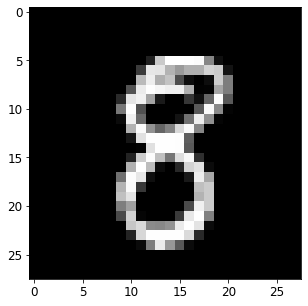

prediction: 8


In [18]:
###
# REPLACE THE <addNumber> WITH ANY NUMBER BETWEEN 0 AND 1999
###
sample = test_X[1330].reshape(dim, dim)
###
graph.imshow(sample, cmap = 'gray', interpolation = 'nearest')
graph.show()

prediction = model.predict(sample.reshape(1, dim, dim, 1))
print('prediction: %i' %(np.argmax(prediction)))